<a href="https://colab.research.google.com/github/SachithraDewmini/Cancer-prediction-using-ML/blob/Sachithra/Cancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [7]:
# Importing the dataset and reading it into a DataFrame
path ='/content/drive/MyDrive/Cancer_Prediction/CancerData.csv'

cancer_data = pd.read_csv(path)

In [8]:
# Display all columns of the DataFrame
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataset
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Drop the 'id' column as it is not needed for the analysis
cancer_data.drop('id', axis=1, inplace=True)


In [10]:
# Encode the 'diagnosis' column (B -> 0, M -> 1)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cancer_data['diagnosis']= le.fit_transform(cancer_data['diagnosis'])


In [11]:
# Display the first few rows after encoding
cancer_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Display the normalized value counts of the 'diagnosis' column
cancer_data['diagnosis'].value_counts(normalize= True)


diagnosis
1    0.5
0    0.5
Name: proportion, dtype: float64

In [13]:
# Display information about the dataset
cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                712 non-null    int64  
 1   radius_mean              712 non-null    float64
 2   texture_mean             712 non-null    float64
 3   perimeter_mean           712 non-null    float64
 4   area_mean                712 non-null    float64
 5   smoothness_mean          712 non-null    float64
 6   compactness_mean         712 non-null    float64
 7   concavity_mean           712 non-null    float64
 8   concave points_mean      712 non-null    float64
 9   symmetry_mean            712 non-null    float64
 10  fractal_dimension_mean   712 non-null    float64
 11  radius_se                712 non-null    float64
 12  texture_se               712 non-null    float64
 13  perimeter_se             712 non-null    float64
 14  area_se                  7

In [14]:
# Display the value counts of a specified column
cancer_data['diagnosis'].value_counts()


diagnosis
1    356
0    356
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

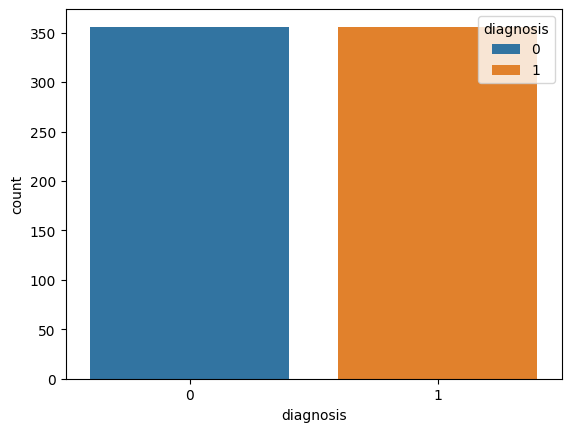

In [15]:
# Plotting the countplot
sns.countplot(x='diagnosis',hue='diagnosis',data=cancer_data)

In [16]:
# Drop the 'Unnamed: 32' column as it is not needed for the analysis
if 'Unnamed: 32' in cancer_data.columns:
    cancer_data.drop('Unnamed: 32', axis=1, inplace=True)
else:
    print("Column 'Unnamed: 32' does not exist in the DataFrame.")

Column 'Unnamed: 32' does not exist in the DataFrame.


In [17]:

# Display the columns of the dataset
cancer_data.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# Display the shape of the dataset
cancer_data.shape
# Display the summary statistics of the dataset
cancer_data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.500000,14.446642,19.675435,94.455702,682.574579,0.098500,0.116231,0.102558,0.055566,0.185491,0.063964,0.426338,1.221710,3.071750,43.129801,0.006956,0.028308,0.034233,0.012643,0.021047,0.004145,16.791678,26.377865,111.266713,930.719663,0.135993,0.298034,0.314579,0.128542,0.304784,0.089439
std,0.500351,3.469251,4.300132,23.924334,345.665344,0.015270,0.060721,0.082594,0.039269,0.029184,0.008511,0.270925,0.573739,2.126059,43.842216,0.002853,0.019640,0.029011,0.006697,0.009126,0.002797,4.702405,6.248635,32.878319,551.555134,0.024973,0.204013,0.232955,0.068242,0.076030,0.025606
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.997500,16.570000,77.580000,442.650000,0.086847,0.069422,0.033708,0.023203,0.163650,0.057807,0.245050,0.855925,1.778000,19.210000,0.005229,0.013767,0.016882,0.008389,0.014998,0.002334,13.340000,21.835000,86.692500,546.600000,0.118100,0.158200,0.138850,0.073872,0.255700,0.073115
50%,0.500000,13.710000,19.610000,88.730000,578.300000,0.097440,0.103500,0.084350,0.050100,0.181950,0.061660,0.348450,1.082000,2.466000,27.230000,0.006302,0.023100,0.027910,0.011595,0.018795,0.003438,15.490000,26.295000,103.550000,740.550000,0.135650,0.231600,0.267800,0.120350,0.293050,0.082215
75%,1.000000,16.187500,22.345000,107.025000,813.175000,0.108250,0.151625,0.157800,0.081967,0.203000,0.068510,0.507900,1.428500,3.541500,50.960000,0.008113,0.037108,0.046902,0.015700,0.023127,0.005043,19.850000,30.730000,129.725000,1226.250000,0.150050,0.390300,0.423825,0.181000,0.328450,0.099400
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
# Compute and display the correlation matrix of selected columns with a heatmap
cancer_data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr().style.background_gradient(cmap='coolwarm')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.659913,0.414065,0.681609,0.633985,0.387318,0.594015,0.682982,0.758796,0.386166,0.127563,0.526497,0.003336,0.505029,0.501903,-0.084043,0.347629,0.281596,0.412133,0.052704,0.181335,0.723725,0.461553,0.736034,0.673125,0.438203,0.564228,0.635224,0.790223,0.455214,0.389694
radius_mean,0.659913,1.000000,0.272269,0.996923,0.988642,0.085502,0.382083,0.598111,0.768726,0.125134,-0.288258,0.691163,-0.051075,0.667275,0.750584,-0.219487,0.167462,0.203222,0.409621,-0.087891,-0.007704,0.963598,0.213428,0.957878,0.939275,0.021535,0.222468,0.385152,0.657305,0.052469,-0.064547
texture_mean,0.414065,0.272269,1.000000,0.283618,0.262263,0.005155,0.242945,0.285619,0.263873,0.125802,0.009488,0.209625,0.385195,0.231866,0.192881,-0.051232,0.245036,0.182660,0.199051,0.040470,0.127988,0.286473,0.901751,0.299013,0.267371,0.078732,0.285339,0.312131,0.278938,0.139055,0.187029
perimeter_mean,0.681609,0.996923,0.283618,1.000000,0.985884,0.133720,0.447885,0.650222,0.807528,0.175903,-0.224686,0.706925,-0.031058,0.694195,0.761404,-0.203603,0.227298,0.247378,0.450651,-0.053230,0.044509,0.962919,0.226245,0.964927,0.937670,0.061193,0.277894,0.434512,0.695442,0.092636,-0.010517
area_mean,0.633985,0.988642,0.262263,0.985884,1.000000,0.084535,0.367379,0.600784,0.765395,0.120048,-0.276107,0.736120,-0.030317,0.705356,0.805513,-0.166149,0.163954,0.211218,0.400982,-0.066353,0.003597,0.955717,0.195697,0.949308,0.953864,0.018829,0.196318,0.366880,0.632322,0.029333,-0.077320
smoothness_mean,0.387318,0.085502,0.005155,0.133720,0.084535,1.000000,0.710748,0.585274,0.577885,0.638401,0.683435,0.251461,0.030132,0.233611,0.186777,0.284611,0.421833,0.284833,0.328728,0.265703,0.361910,0.159553,0.090224,0.193725,0.139107,0.846743,0.595638,0.540792,0.577038,0.564860,0.601393
compactness_mean,0.594015,0.382083,0.242945,0.447885,0.367379,0.710748,1.000000,0.886302,0.813075,0.703464,0.703400,0.446916,0.129750,0.516625,0.394356,0.086819,0.803621,0.597404,0.626825,0.364907,0.625047,0.428770,0.274148,0.497972,0.392435,0.611731,0.863232,0.820270,0.816441,0.633491,0.738664
concavity_mean,0.682982,0.598111,0.285619,0.650222,0.600784,0.585274,0.886302,1.000000,0.924221,0.585995,0.458421,0.595499,0.095490,0.617024,0.575947,0.083783,0.708783,0.705978,0.656615,0.260864,0.528810,0.623080,0.292089,0.677188,0.602376,0.503511,0.742967,0.868541,0.869868,0.496256,0.557889
concave points_mean,0.758796,0.768726,0.263873,0.807528,0.765395,0.577885,0.813075,0.924221,1.000000,0.535953,0.283234,0.692201,0.049058,0.691347,0.678841,0.013224,0.540274,0.480394,0.624489,0.182780,0.350620,0.791164,0.258790,0.825437,0.764701,0.465810,0.622579,0.725834,0.908312,0.432626,0.396199
symmetry_mean,0.386166,0.125134,0.125802,0.175903,0.120048,0.638401,0.703464,0.585995,0.535953,1.000000,0.607960,0.313482,0.167486,0.354460,0.225128,0.139229,0.544535,0.400898,0.447284,0.512760,0.449610,0.174104,0.133086,0.226347,0.151204,0.498488,0.566350,0.510251,0.516727,0.726043,0.518200


In [20]:
# Select relevant columns and compute the correlation matrix with a heatmap
relevant= cancer_data[['diagnosis', 'fractal_dimension_mean', 'concave points_worst', 'radius_worst','perimeter_worst',	'area_worst', 'perimeter_mean', 'area_mean', 'radius_mean' ]]
relevant.corr().style.background_gradient(cmap='coolwarm')


,diagnosis,fractal_dimension_mean,concave points_worst,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean
diagnosis,1.000000,0.127563,0.790223,0.723725,0.736034,0.673125,0.681609,0.633985,0.659913
fractal_dimension_mean,0.127563,1.000000,0.333994,-0.213304,-0.152108,-0.217433,-0.224686,-0.276107,-0.288258
concave points_worst,0.790223,0.333994,1.000000,0.726485,0.760793,0.680888,0.695442,0.632322,0.657305
radius_worst,0.723725,-0.213304,0.726485,1.000000,0.991343,0.984861,0.962919,0.955717,0.963598
perimeter_worst,0.736034,-0.152108,0.760793,0.991343,1.000000,0.974899,0.964927,0.949308,0.957878
area_worst,0.673125,-0.217433,0.680888,0.984861,0.974899,1.000000,0.937670,0.953864,0.939275
perimeter_mean,0.681609,-0.224686,0.695442,0.962919,0.964927,0.937670,1.000000,0.985884,0.996923
area_mean,0.633985,-0.276107,0.632322,0.955717,0.949308,0.953864,0.985884,1.000000,0.988642
radius_mean,0.659913,-0.288258,0.657305,0.963598,0.957878,0.939275,0.996923,0.988642,1.000000


In [21]:

# Define features (X) and target (y)
X= cancer_data[['fractal_dimension_mean', 'concave points_worst', 'perimeter_worst']]
y= cancer_data['diagnosis']

In [22]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)
# Standardize the features
scx= StandardScaler()
X_train_scled= scx.fit_transform(X_train)
X_test_scled= scx.transform(X_test)


In [23]:
# separating into train and testing
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,Y_train.shape)
print("Shape of Y_test  is " ,Y_test.shape)


Shape of X_train is  (569, 3)
Shape of X_test  is  (143, 3)
Shape of Y_train is  (569,)
Shape of Y_test  is  (143,)


In [24]:
# After statify Y train & test values
Y_train_series = pd.Series(Y_train)
Y_test_series = pd.Series(Y_test)

print(Y_train_series.value_counts())
print(Y_test_series.value_counts())

diagnosis
1    285
0    284
Name: count, dtype: int64
diagnosis
0    72
1    71
Name: count, dtype: int64


In [25]:

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scled, y_train)
# Make predictions on the test set
y_pred= lr.predict(X_test_scled)
y_pred


array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [26]:

# Compute the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)


0.9252336448598131

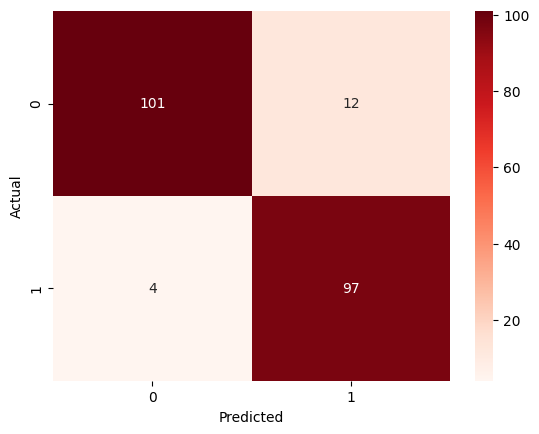

In [27]:
# Display the confusion matrix with a heatmap
cm= pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [28]:

# Display the last few rows of the dataset
cancer_data.tail()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
707,1,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,3.568,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
708,1,15.85,23.95,103.70,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,0.05338,0.4033,1.078,2.903,36.58,0.009769,0.03126,0.05051,0.01992,0.02981,0.003002,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287
709,1,13.73,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
710,1,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.033,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410
711,1,14.68,20.13,94.74,684.5,0.09867,0.0720,0.07395,0.05259,0.1586,0.05922,0.4727,1.240,3.195,45.40,0.005718,0.01162,0.01998,0.01109,0.01410,0.002085,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216


In [30]:
# Predict the class of a new sample
Diagnosis=lr.predict(scx.transform([[1.4567, 0.9992, 100.70 ]]))
if (Diagnosis)==1:
  print('If your health condition is bad, seek medical attention immediately')
else:
  print('Happy. Your health is good')

If your health condition is bad, seek medical attention immediately


In [31]:
# Display all rows where diagnosis is 0 (Benign)
cancer_data[cancer_data['diagnosis']==0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.000000,0.1742,0.06059,0.5375,2.9270,3.618,29.110,0.011590,0.011240,0.00000,0.000000,0.03004,0.003324,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321


In [32]:
# Display all rows where diagnosis is 0 (Benign)
cancer_data[cancer_data['diagnosis']==0]


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.000000,0.1742,0.06059,0.5375,2.9270,3.618,29.110,0.011590,0.011240,0.00000,0.000000,0.03004,0.003324,10.490,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321


In [33]:
# Predict the class of another new sample
Diagnosis=lr.predict(scx.transform([[0.06503, 0.02564, 57.26 ]]))
if (Diagnosis)==1:
  print('If your health condition is bad, seek medical attention immediately')
else:
  print('Happy. Your health is good')


Happy. Your health is good


In [34]:

# Random Forest Classifier

# load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

# select model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# train model
rfc.fit(X_train, y_train)

# predict
y_pred = rfc.predict(X_test)

# accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.92      0.97      0.95       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Number of mislabeled points out of a total 171 points : 12


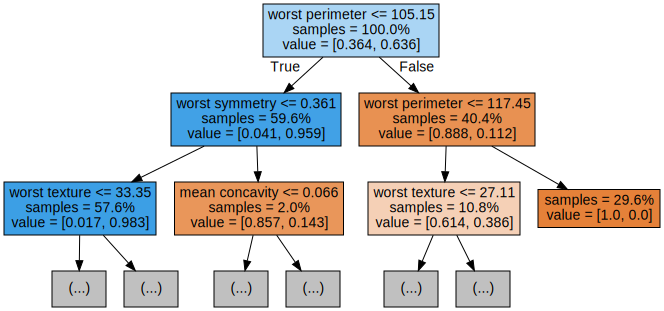

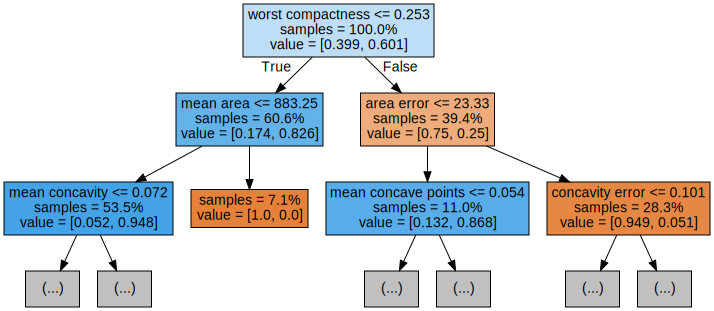

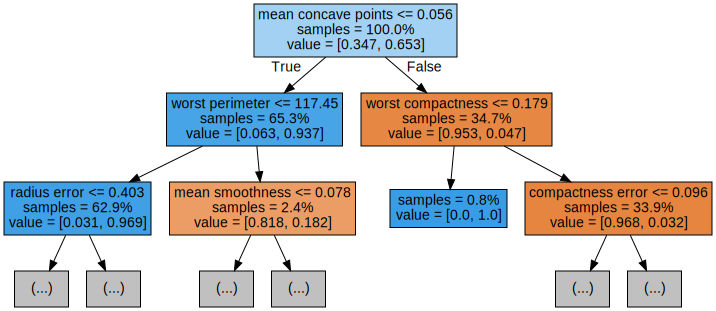

In [35]:
#Visualize Model
# Export the first three decision trees from the random forest classifier

from sklearn.tree import export_graphviz
import graphviz
for i in range(3):
    tree = rfc.estimators_[i]
    dot_data =  export_graphviz(tree,
                               feature_names=load_breast_cancer().feature_names,
                               #feature_names=X_train.columns
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


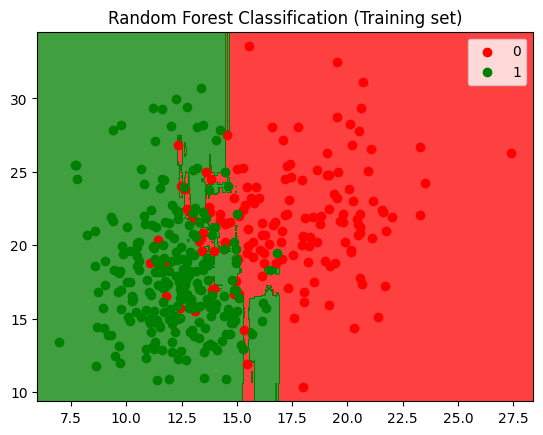

In [36]:
# Visualizing the train results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train[:,0:2], y_train
rfc.fit(X_set,y_set)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
#plt.xlabel(X_train.columns[0])
#plt.ylabel(y_set.columns)
plt.legend()
plt.show()

In [37]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}
grid = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)

In [38]:
#to find the best hyperparameters for a random forest classifier
# train grid
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

# predict grid
y_pred = grid.predict(X_test)

# evaluation grid
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.984
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.92      0.97      0.95       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [39]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))


score on test: 0.9005847953216374
score on train: 0.8944723618090452


In [40]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes= None,
                                    min_samples_leaf=14, min_samples_split=2 ,
                                    random_state = 12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes']
)



              precision    recall  f1-score   support

           0       0.88      0.83      0.85        64
           1       0.90      0.93      0.92       107

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171



,Predicted No,Predicted Yes
Actual No,53,11
Actual Yes,7,100


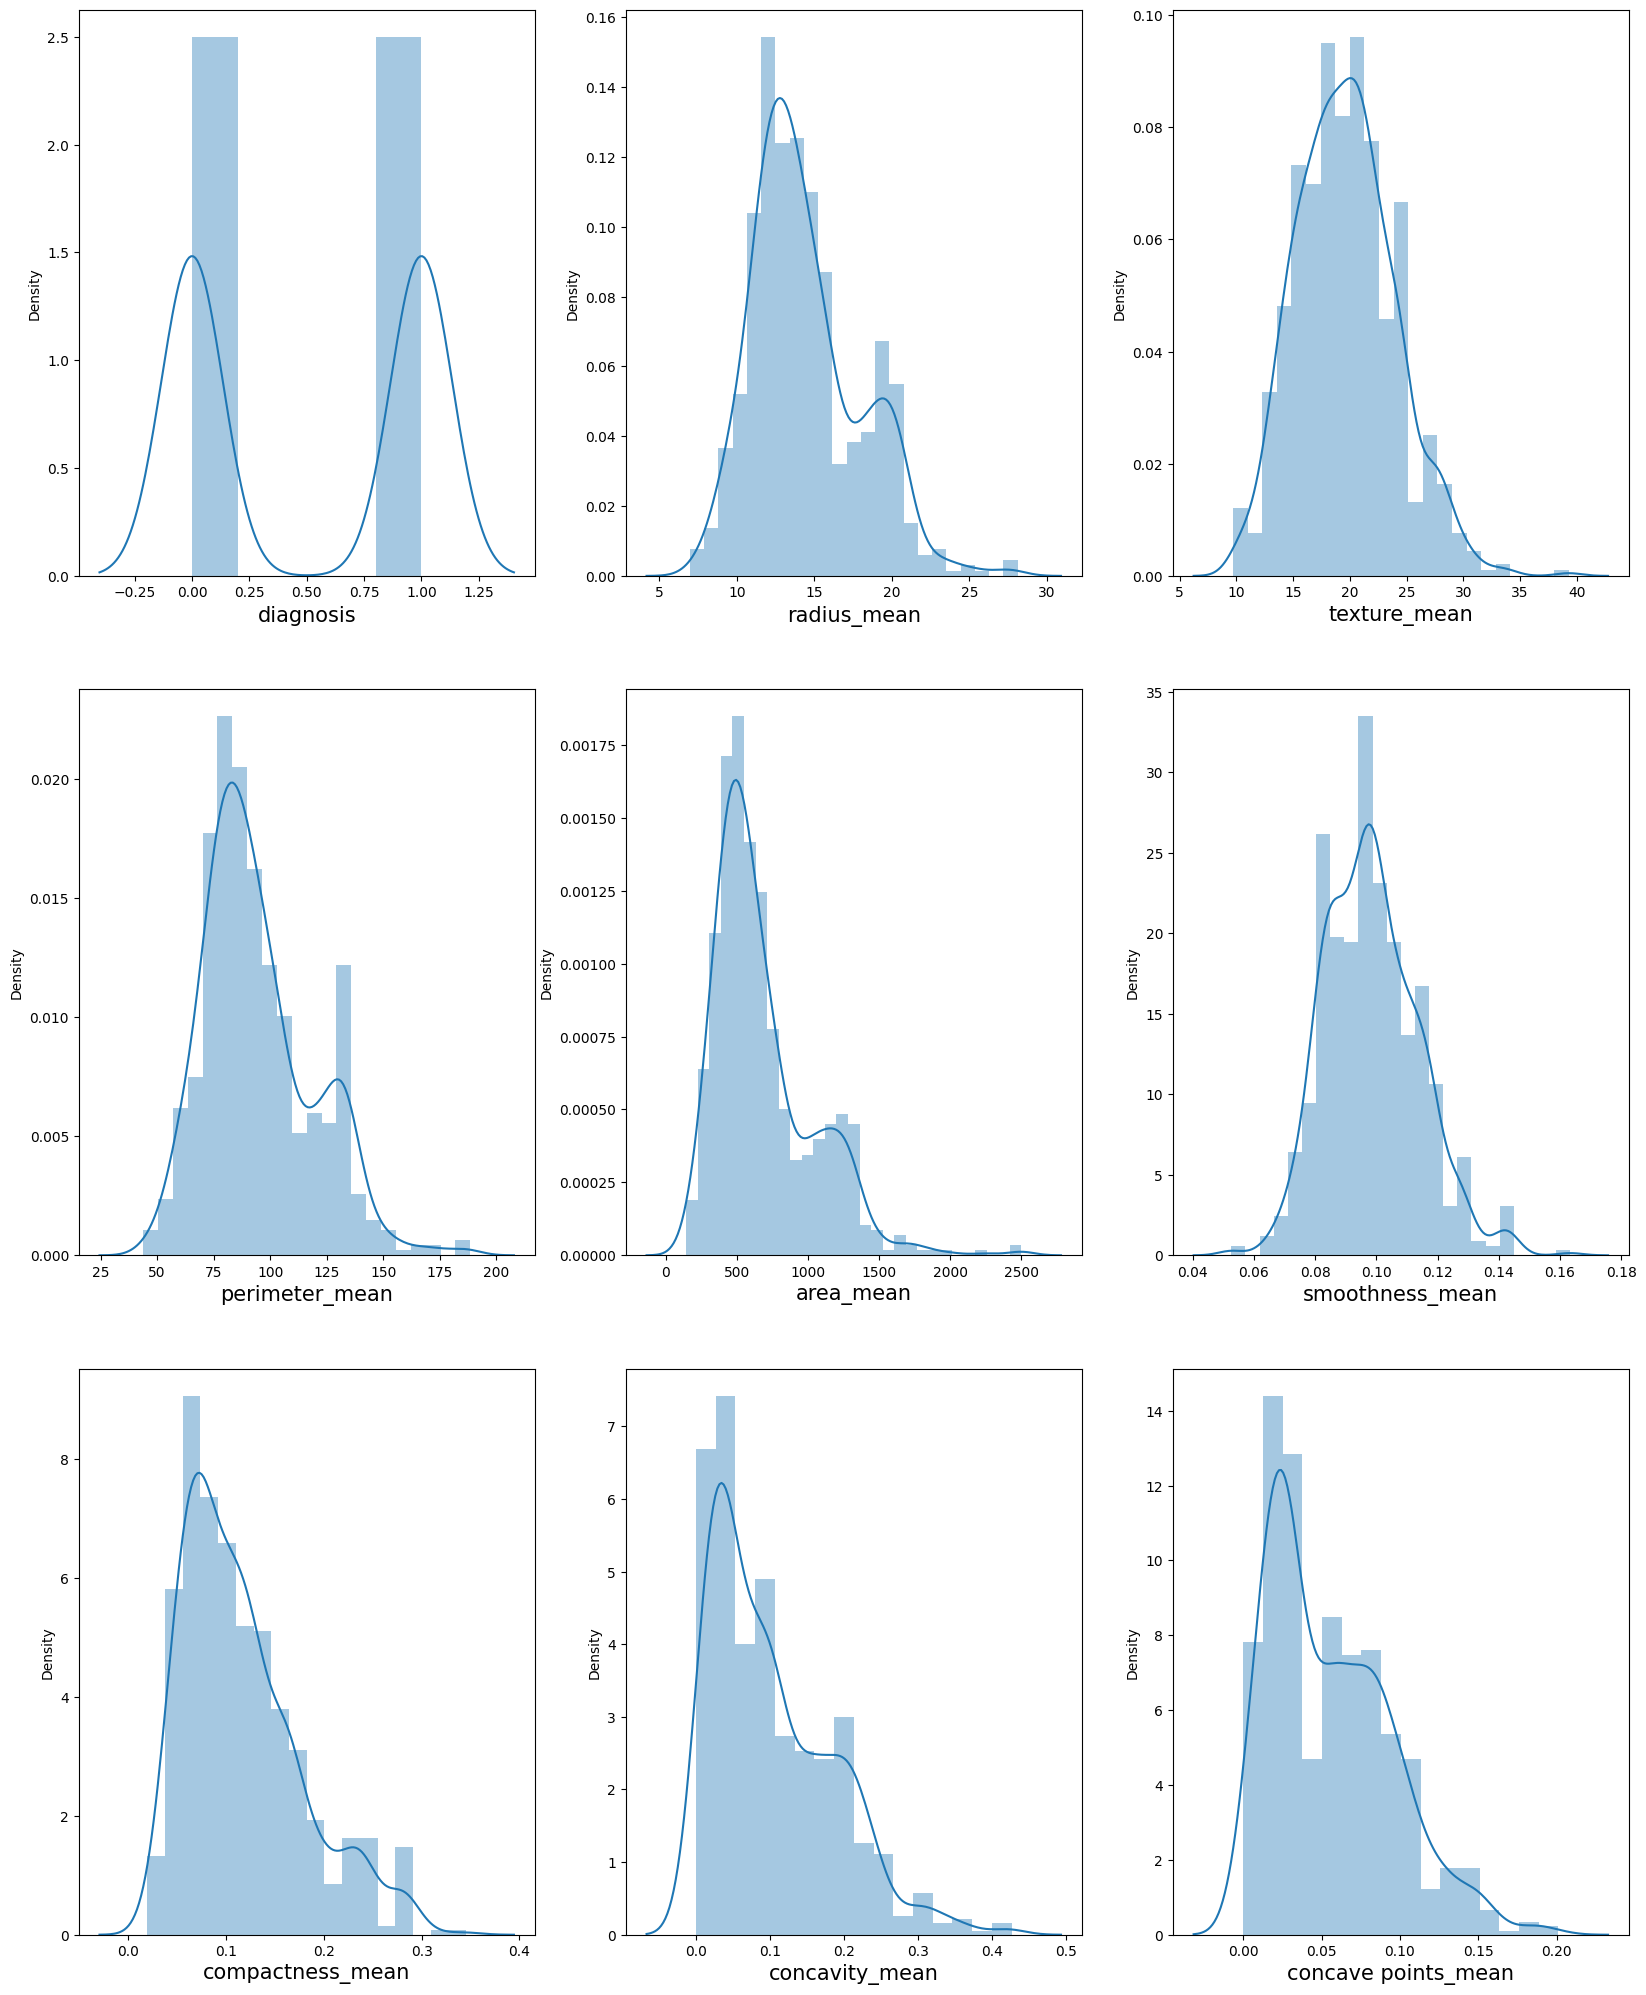

In [41]:
#Visualize Distribution of Columns
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in cancer_data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(cancer_data[column])
        plt.xlabel(column, fontsize = 15)

    plotnumber += 1
plt.show()

